In [1]:
import pandas as pd
import numpy as np

In [20]:
weather = pd.read_csv('C:/Temp/Weather_2018.csv', encoding='euc-kr', parse_dates=['일시'])

In [21]:
weather.drop(['지점', '최저기온 시각(hhmi)', '최고기온 시각(hhmi)', '최대 순간풍속 시각(hhmi)','최대 순간 풍속 풍향(deg)'], axis='columns', inplace=True)
weather['일교차(°C)'] = weather["최고기온(°C)"] - weather["최저기온(°C)"]
weather.drop(['최저기온(°C)','최고기온(°C)'], axis='columns', inplace=True)
weather.drop(['Unnamed: 0'], axis='columns', inplace=True)

In [22]:
weather.loc[weather.지점명=='기상청', '지점명'] = '동작'
weather.loc[weather.지점명=='북한산', '지점명'] = '강북'
weather.loc[weather.지점명=='북악산', '지점명'] = '종로'
weather.loc[weather.지점명=='기상청', '지점명'] = '동작'
weather.loc[weather.지점명=='현충원', '지점명'] = '동작'
weather.loc[weather.지점명=='서초 *', '지점명'] = '서초'
weather.loc[weather.지점명=='영등포 *', '지점명'] = '영등포'
weather.loc[weather.지점명=='용산 *', '지점명'] = '용산'
weather.loc[weather.지점명=='양천 *', '지점명'] = '양천'
weather.loc[weather.지점명=='송파 *', '지점명'] = '송파'

In [23]:
set(weather["지점명"])

{'강남',
 '강동',
 '강북',
 '강서',
 '관악',
 '광진',
 '구로',
 '금천',
 '남현',
 '노원',
 '도봉',
 '동대문',
 '동작',
 '마포',
 '서대문',
 '서초',
 '성동',
 '성북',
 '송파',
 '양천',
 '영등포',
 '용산',
 '은평',
 '종로',
 '중구',
 '중랑',
 '한강'}

In [24]:
np.sum(pd.isnull(weather))

일시                 0
평균기온(°C)         171
일강수량(mm)           9
최대 순간 풍속(m/s)    858
평균 풍속(m/s)       166
지점명                0
위도                 0
경도                 0
일교차(°C)          140
dtype: int64

In [26]:
weather = weather.interpolate() 

In [27]:
np.sum(pd.isnull(weather))

일시               0
평균기온(°C)         0
일강수량(mm)         0
최대 순간 풍속(m/s)    0
평균 풍속(m/s)       0
지점명              0
위도               0
경도               0
일교차(°C)          0
dtype: int64

In [28]:
weather.describe()

,평균기온(°C),일강수량(mm),최대 순간 풍속(m/s),평균 풍속(m/s),위도,경도,일교차(°C)
count,22591.000000,22591.000000,22591.000000,22591.000000,22591.000000,22591.000000,22591.000000
mean,12.970426,3.418408,6.863640,1.610402,37.544019,126.984535,9.171387
std,11.313226,12.709070,2.335179,0.739423,0.055741,0.078413,3.058810
min,-19.700000,0.000000,2.100000,0.100000,37.450000,126.827000,1.700000
25%,4.400000,0.000000,5.200000,1.100000,37.498200,126.933900,7.000000
50%,13.900000,0.000000,6.500000,1.500000,37.537900,126.977500,9.000000
75%,22.300000,0.000000,8.000000,1.900000,37.584600,127.046700,11.100000
max,34.400000,249.500000,23.200000,6.700000,37.663300,127.148400,22.600000


In [29]:
set(weather["지점명"])

{'강남',
 '강동',
 '강북',
 '강서',
 '관악',
 '광진',
 '구로',
 '금천',
 '남현',
 '노원',
 '도봉',
 '동대문',
 '동작',
 '마포',
 '서대문',
 '서초',
 '성동',
 '성북',
 '송파',
 '양천',
 '영등포',
 '용산',
 '은평',
 '종로',
 '중구',
 '중랑',
 '한강'}

In [30]:
grouped_w = weather.groupby(weather['지점명']).mean()
grouped_w_d = weather.groupby([weather['지점명'], weather['일시']]).mean()

In [31]:
grouped_w_d

평균기온(°C)  일강수량(mm)  최대 순간 풍속(m/s)  평균 풍속(m/s)       위도  \
지점명 일시                                                                   
강남  2018-01-01       0.3       0.0            6.4         1.4  37.5070   
    2018-01-02      -0.9       0.0            7.3         1.7  37.5070   
    2018-01-03      -3.7       0.0            6.3         2.0  37.5070   
    2018-01-04      -3.7       0.0            4.2         1.1  37.5070   
    2018-01-05      -1.5       0.0            6.3         1.5  37.5070   
    2018-01-06      -1.3       0.0            5.0         1.6  37.5070   
    2018-01-07      -0.4       0.0            4.6         1.1  37.5070   
    2018-01-08       1.8       0.5           10.5         1.8  37.5070   
    2018-01-09      -3.3       0.0            9.5         2.4  37.5070   
    2018-01-10      -6.5       0.0            9.0         2.3  37.5070   
    2018-01-11     -10.3       0.0            7.6         2.4  37.5070   
    2018-01-12      -9.4       0.0            6.1         1.6  37.5070   
    2018-01-13      -4.3       0.0            3.9         1.3  37.5070   
    2018-01-14       0.8       0.0            5.4         1.4  37.5070   
    2018-01-15       5.4       0.0            5.8         1.3  37.5070   
    2018-01-16       3.9       0.0            3.3         0.9  37.5070   
    2018-01-17       5.1       0.0            5.5         1.1  37.5070   
    2018-01-18       3.2       0.0            5.3         1.6  37.5070   
    2018-01-19       2.3       0.0            5.7         1.3  37.5070   
    2018-01-20       3.2       0.0            6.0         1.4  37.5070   
    2018-01-21       1.9       0.0            4.3         1.0  37.5070   
    2018-01-22       0.6       4.5            8.1         1.6  37.5070   
    2018-01-23     -11.0       0.0           10.2         2.9  37.5070   
    2018-01-24     -13.5       0.0            9.1         2.3  37.5070   
    2018-01-25     -13.3       0.0            7.7         2.1  37.5070   
    2018-01-26     -13.8       0.0            7.8         2.2  37.5070   
    2018-01-27      -9.0       0.0            4.2         1.4  37.5070   
    2018-01-28      -5.1       0.0            8.4         2.1  37.5070   
    2018-01-29      -7.5       0.0           10.3         2.1  37.5070   
    2018-01-30      -4.5       0.0            6.7         1.3  37.5070   
...                  ...       ...            ...         ...      ...   
한강  2018-12-02       9.0       0.0            5.6         2.5  37.5231   
    2018-12-03      11.4       8.0            7.4         2.2  37.5231   
    2018-12-04       7.0       6.0           10.7         3.4  37.5231   
    2018-12-05       1.3       0.0            7.5         2.4  37.5231   
    2018-12-06       2.8       0.0           12.4         2.7  37.5231   
    2018-12-07      -6.4       0.0           11.5         5.2  37.5231   
    2018-12-08      -7.4       0.0            9.5         3.9  37.5231   
    2018-12-09      -6.0       0.0            7.1         2.3  37.5231   
    2018-12-10      -1.3       0.0            4.6         1.5  37.5231   
    2018-12-11       1.5       0.0            6.4         1.9  37.5231   
    2018-12-12      -1.0       0.0            6.3         2.7  37.5231   
    2018-12-13      -1.1       0.5           10.1         2.9  37.5231   
    2018-12-14      -3.1       0.0            5.8         2.3  37.5231   
    2018-12-15      -1.0       0.0            4.5         1.3  37.5231   
    2018-12-16       1.4       0.0            4.5         1.6  37.5231   
    2018-12-17       2.5       0.0            6.7         2.0  37.5231   
    2018-12-18       4.2       0.0            9.2         1.4  37.5231   
    2018-12-19       4.7       0.0            6.4         1.2  37.5231   
    2018-12-20       4.6       0.0            4.6         1.1  37.5231   
    2018-12-21       6.6       0.0            5.5         1.7  37.5231   
    2018-12-22       6.4       0.0            5.1         1.8  37.5231   
    2018-12-23      

In [32]:
munji = pd.read_excel('C:/Temp/미세초미세_2018.xlsx', parse_dates=['측정일시'])
munji.rename(columns={'측정소명': '지점명', '측정일시': '일시'}, inplace=True)

In [33]:
munji.loc[munji.지점명=='강남구', '지점명'] = '강남'
munji.loc[munji.지점명== '강남대로', '지점명'] = '강남'
munji.loc[munji.지점명== '강동구', '지점명'] = '강동'
munji.loc[munji.지점명== '강변북로', '지점명'] = '광진'
munji.loc[munji.지점명== '강북구', '지점명'] = '강북'
munji.loc[munji.지점명== '강서구', '지점명'] = '강서'
munji.loc[munji.지점명== '공항대로', '지점명'] = '강서'
munji.loc[munji.지점명== '관악구', '지점명'] = '관악'
munji.loc[munji.지점명== '관악산', '지점명'] = '관악'
munji.loc[munji.지점명== '광진구', '지점명'] = '광진'
munji.loc[munji.지점명== '구로구', '지점명'] = '구로'
munji.loc[munji.지점명== '궁동', '지점명'] = '구로'
munji.loc[munji.지점명== '금천구', '지점명'] = '금천'
munji.loc[munji.지점명== '남산', '지점명'] = '중구'
munji.loc[munji.지점명== '노원구', '지점명'] = '노원'
munji.loc[munji.지점명== '도봉구', '지점명'] = '도봉'
munji.loc[munji.지점명== '도산대로', '지점명'] = '강남'
munji.loc[munji.지점명== '동대문구', '지점명'] = '동대문'
munji.loc[munji.지점명== '동작구', '지점명'] = '동작'
munji.loc[munji.지점명== '동작대로', '지점명'] = '동작'
munji.loc[munji.지점명== '마포구', '지점명'] = '마포'
munji.loc[munji.지점명== '북한산', '지점명'] = '강북'
munji.loc[munji.지점명== '서대문구', '지점명'] = '서대문'
munji.loc[munji.지점명== '서초구', '지점명'] = '서초'
munji.loc[munji.지점명== '성동구', '지점명'] = '성동'
munji.loc[munji.지점명== '성북구', '지점명'] = '성북'
munji.loc[munji.지점명== '세곡', '지점명'] = '강남'
munji.loc[munji.지점명== '송파구', '지점명'] = '송파'
munji.loc[munji.지점명== '시흥대로', '지점명'] = '금천'
munji.loc[munji.지점명== '신촌로', '지점명'] = '서대문'
munji.loc[munji.지점명== '양천구', '지점명'] = '양천'
munji.loc[munji.지점명== '영등포구', '지점명'] = '영등포'
munji.loc[munji.지점명== '영등포로', '지점명'] = '영등포'
munji.loc[munji.지점명== '용산구', '지점명'] = '용산'
munji.loc[munji.지점명== '은평구', '지점명'] = '은평'
munji.loc[munji.지점명== '정릉로', '지점명'] = '성북'
munji.loc[munji.지점명== '종로', '지점명'] = '종로'
munji.loc[munji.지점명== '종로구', '지점명'] = '종로'
munji.loc[munji.지점명== '중구', '지점명'] = '중구'
munji.loc[munji.지점명== '중랑구', '지점명'] = '중랑'
munji.loc[munji.지점명== '천호대로', '지점명'] = '강동'
munji.loc[munji.지점명== '청계천로', '지점명'] = '종로'
munji.loc[munji.지점명== '한강대로', '지점명'] = '용산'
munji.loc[munji.지점명== '행주', '지점명'] = '강서'
munji.loc[munji.지점명== '홍릉로', '지점명'] = '동대문'
munji.loc[munji.지점명== '화랑로', '지점명'] = '성북'

In [34]:
np.sum(pd.isnull(munji))

일시              0
지점명             0
미세먼지(㎍/㎥)     344
초미세먼지(㎍/㎥)    338
dtype: int64

In [35]:
munji = munji.interpolate() 

In [36]:
munji.describe()

,미세먼지(㎍/㎥),초미세먼지(㎍/㎥)
count,12447.000000,12447.000000
mean,40.358319,22.690889
std,23.004976,15.093312
min,3.000000,1.000000
25%,24.000000,12.000000
50%,36.000000,19.500000
75%,52.000000,30.000000
max,199.000000,127.000000


In [37]:
set(munji["지점명"])

{'강남',
 '강동',
 '강북',
 '강서',
 '관악',
 '광진',
 '구로',
 '금천',
 '노원',
 '도봉',
 '동대문',
 '동작',
 '마포',
 '서대문',
 '서초',
 '성동',
 '성북',
 '송파',
 '양천',
 '영등포',
 '용산',
 '은평',
 '종로',
 '중구',
 '중랑'}

munji['일시'] = pd.to_datestamp(munji['일시'], unit='s')

from datetime import datetime
datetime.strptime(hii,'%y-%m-%d')

In [38]:
grouped_m = munji.groupby([munji['지점명']]).mean()
grouped_m_d = munji.groupby([munji['지점명'], munji['일시']]).mean()

In [39]:
grouped_m_d

미세먼지(㎍/㎥)  초미세먼지(㎍/㎥)
지점명 일시                                
강남  2018-01-01   42.333333   19.666667
    2018-01-02   48.333333   21.333333
    2018-01-03   39.666667   18.000000
    2018-01-04   48.000000   23.000000
    2018-01-05   58.000000   31.000000
    2018-01-06   50.333333   27.666667
    2018-01-07   60.000000   36.333333
    2018-01-08   59.333333   34.333333
    2018-01-09   44.333333   17.666667
    2018-01-10   36.333333   12.666667
    2018-01-11   36.666667   21.000000
    2018-01-12   29.333333   14.666667
    2018-01-13   53.333333   36.000000
    2018-01-14   70.000000   46.333333
    2018-01-15   71.333333   41.666667
    2018-01-16  115.333333   69.333333
    2018-01-17  115.000000   74.333333
    2018-01-18   90.666667   51.333333
    2018-01-19   64.000000   27.000000
    2018-01-20  104.333333   53.666667
    2018-01-21   73.333333   33.666667
    2018-01-22   55.666667   24.333333
    2018-01-23   29.000000   11.333333
    2018-01-24   34.333333   10.666667
    2018-01-25   27.000000   12.333333
    2018-01-26   34.666667   19.333333
    2018-01-27   49.000000   27.333333
    2018-01-28   33.666667   18.666667
    2018-01-29   48.666667   16.333333
    2018-01-30   44.000000   20.666667
...                    ...         ...
중랑  2018-12-02   40.000000   20.000000
    2018-12-03   36.000000   18.000000
    2018-12-04   28.000000   14.000000
    2018-12-05   25.000000   11.000000
    2018-12-06   32.000000   16.000000
    2018-12-07   16.000000    7.000000
    2018-12-08   19.000000    8.000000
    2018-12-09   20.000000   10.000000
    2018-12-10   28.000000   15.000000
    2018-12-11   30.000000   17.000000
    2018-12-12   40.000000   21.000000
    2018-12-13   35.000000   22.000000
    2018-12-14   30.000000   16.000000
    2018-12-15   48.000000   31.000000
    2018-12-16   49.000000   34.000000
    2018-12-17   68.000000   47.000000
    2018-12-18   38.000000   26.000000
    2018-12-19   46.000000   33.000000
    2018-12-20   49.000000   35.000000
    2018-12-21   61.000000   45.000000
    2018-12-22   80.000000   64.000000
    2018-12-23   48.000000   33.000000
    2018-12-24   19.000000   13.000000
    2018-12-25   29.000000   21.000000
    2018-12-26   40.000000   25.000000
    2018-12-27   22.000000    9.000000
    2018-12-28   28.000000   14.000000
    2018-12-29   29.000000    9.000000
    2018-12-30   27.000000   16.000000
    2018-12-31   44.000000   31.000000

[7725 rows x 2 columns]

In [40]:
#munji.sort_values(by=['측정소명','측정일시'], axis=0)
#weather.sort_values(by=['지점명','일시'], axis=0)
#set(weather['지점명'])
#set(munji['측정소명'].sort_values())

In [42]:
data_Weather=pd.merge(grouped_w_d,grouped_m_d, on=["지점명","일시"],how="left")
data_Weather.reset_index(inplace=True)

In [43]:
pd.isnull(data_Weather).sum()

지점명                 0
일시                  0
평균기온(°C)            0
일강수량(mm)            0
최대 순간 풍속(m/s)       0
평균 풍속(m/s)          0
위도                  0
경도                  0
일교차(°C)             0
미세먼지(㎍/㎥)        2129
초미세먼지(㎍/㎥)       2129
dtype: int64

In [45]:
data_Weather= data_Weather.interpolate() 

In [46]:
data1 = pd.read_csv('C:/Temp/0104.csv',encoding = 'cp949',parse_dates=['일자'])
data2 = pd.read_csv('C:/Temp/0508.csv',encoding = 'cp949',parse_dates=['일자'])
data3 = pd.read_csv('C:/Temp/0912.csv',encoding = 'cp949',parse_dates=['일자']) 

In [47]:
data = pd.concat([data1,data2,data3]) 
data.shape

(548057, 9)

In [48]:
data_Weather.head()

,지점명,일시,평균기온(°C),일강수량(mm),최대 순간 풍속(m/s),평균 풍속(m/s),위도,경도,일교차(°C),미세먼지(㎍/㎥),초미세먼지(㎍/㎥)
0,강남,2018-01-01,0.3,0.0,6.4,1.4,37.507,127.058933,5.8,42.333333,19.666667
1,강남,2018-01-02,-0.9,0.0,7.3,1.7,37.507,127.058933,5.6,48.333333,21.333333
2,강남,2018-01-03,-3.7,0.0,6.3,2.0,37.507,127.058933,4.9,39.666667,18.000000
3,강남,2018-01-04,-3.7,0.0,4.2,1.1,37.507,127.058933,5.4,48.000000,23.000000
4,강남,2018-01-05,-1.5,0.0,6.3,1.5,37.507,127.058933,5.2,58.000000,31.000000


In [49]:
data_Weather.shape

(9821, 11)

In [50]:
data.head()

,Unnamed: 0,일자,요일,성별,연령,발신지_시도,발신지_구,발신지_읍면동,통화건수
0,72,2018-01-01,월,남,10대,서울특별시,강남구,도곡동,5
1,73,2018-01-01,월,남,10대,서울특별시,강남구,역삼동,5
2,74,2018-01-01,월,남,20대,서울특별시,강남구,일원동,5
3,75,2018-01-01,월,남,30대,서울특별시,강남구,수서동,5
4,76,2018-01-01,월,남,30대,서울특별시,강남구,개포동,5


In [51]:
data.drop(['Unnamed: 0','발신지_시도'],axis='columns',inplace=True)

In [52]:
data.rename(columns={'일자':'일시','발신지_구':'지점명'},inplace=True)

In [53]:
data_Weather.reset_index(inplace=True)

In [54]:
var2= "구"
data_Weather["지점명"]=[s+var2 for s in data_Weather["지점명"]]
data_Weather.head()

In [57]:
data_Weather.loc[data_Weather.지점명=='중구구', '지점명'] = '중구'

In [58]:
Data = pd.merge(data,data_Weather,on=['지점명','일시'],how="left")

In [64]:
Data.head()

,일시,요일,성별,연령,지점명,발신지_읍면동,통화건수,index,평균기온(°C),일강수량(mm),평균 풍속(m/s),위도,경도,일교차(°C),미세먼지(㎍/㎥),초미세먼지(㎍/㎥)
0,2018-01-01,월,남,10대,강남구,도곡동,5,0.0,0.3,0.0,1.4,37.507,127.058933,5.8,42.333333,19.666667
1,2018-01-01,월,남,10대,강남구,역삼동,5,0.0,0.3,0.0,1.4,37.507,127.058933,5.8,42.333333,19.666667
2,2018-01-01,월,남,20대,강남구,일원동,5,0.0,0.3,0.0,1.4,37.507,127.058933,5.8,42.333333,19.666667
3,2018-01-01,월,남,30대,강남구,수서동,5,0.0,0.3,0.0,1.4,37.507,127.058933,5.8,42.333333,19.666667
4,2018-01-01,월,남,30대,강남구,개포동,5,0.0,0.3,0.0,1.4,37.507,127.058933,5.8,42.333333,19.666667


In [60]:
Data.drop(["최대 순간 풍속(m/s)"],axis=1,inplace=True)

In [61]:
pd.isnull(Data).sum()

일시               0
요일               0
성별               0
연령               0
지점명              0
발신지_읍면동          0
통화건수             0
index         1005
평균기온(°C)      1005
일강수량(mm)      1005
평균 풍속(m/s)    1005
위도            1005
경도            1005
일교차(°C)       1005
미세먼지(㎍/㎥)     1005
초미세먼지(㎍/㎥)    1005
dtype: int64

In [62]:
Data=Data.interpolate() 

In [63]:
pd.isnull(Data).sum()

일시            0
요일            0
성별            0
연령            0
지점명           0
발신지_읍면동       0
통화건수          0
index         0
평균기온(°C)      0
일강수량(mm)      0
평균 풍속(m/s)    0
위도            0
경도            0
일교차(°C)       0
미세먼지(㎍/㎥)     0
초미세먼지(㎍/㎥)    0
dtype: int64

In [96]:
Data.describe()

,통화건수,평균기온(°C),일강수량(mm),평균 풍속(m/s),위도,경도,일교차(°C),미세먼지(㎍/㎥),초미세먼지(㎍/㎥)
count,548057.000000,548057.000000,548057.000000,548057.000000,548057.000000,548057.000000,548057.000000,548057.000000,548057.000000
mean,28.877197,13.497925,3.587985,1.722072,37.549531,126.988498,8.958734,40.276942,23.007978
std,61.728355,11.207242,12.564641,0.797441,0.046095,0.076843,2.922126,22.154854,14.670791
min,5.000000,-19.700000,0.000000,0.100000,37.453000,126.839750,1.700000,3.000000,1.000000
25%,5.000000,5.000000,0.000000,1.200000,37.509850,126.935050,6.900000,24.400000,12.000000
50%,5.000000,14.600000,0.000000,1.550000,37.547400,126.986900,8.800000,37.000000,20.000000
75%,15.000000,22.500000,0.000000,2.100000,37.584500,127.055250,10.800000,52.000000,30.500000
max,995.000000,34.400000,249.500000,6.700000,37.636500,127.146700,22.600000,199.000000,102.000000


In [98]:
Data["log_통화건수"] = np.log(Data["통화건수"])

In [65]:
Data.drop(['index'], axis='columns', inplace=True)

In [8]:
Data = pd.read_csv('C:/Temp/final data.csv', encoding='euc-kr', parse_dates=['일시'])

In [39]:
Data = pd.read_csv('C:/Temp/final_data2.csv', encoding='euc-kr', parse_dates=['일시'])

In [12]:
%matplotlib inline 
import matplotlib.pyplot as plt 
import seaborn as sns  
plt.rcParams["font.family"] = 'nanummyeongjo'
plt.rcParams['axes.unicode_minus'] = False

In [44]:
Data = Data.iloc[:,0:10]

In [45]:
Data.head()

,지점,일시,요일,통화건수,평균기온(°C),일강수량(mm),평균 풍속(m/s),일교차(°C),미세먼지(㎍/㎥),초미세먼지(㎍/㎥)
0,강남구,2017-12-01,금,69.312000,-1.1,0.0,1.5,8.1,20.0,14.0
1,강남구,2017-12-02,토,37.642857,2.5,0.0,1.3,10.1,36.0,27.0
2,강남구,2017-12-03,일,7.841270,5.1,1.5,1.2,4.4,46.0,40.0
3,강남구,2017-12-04,월,79.786765,-0.3,0.0,2.4,9.9,38.0,29.0
4,강남구,2017-12-05,화,71.541985,-3.4,0.0,2.1,5.8,17.0,11.0


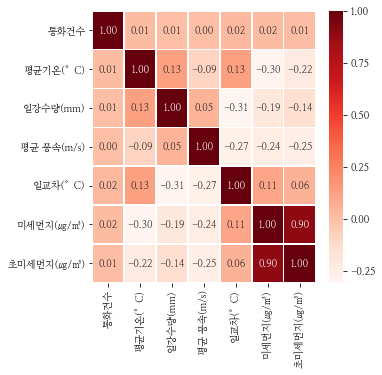

In [55]:
plt.figure(figsize=(5,5))
sns.heatmap(data = Data.corr(), annot=True, fmt = '.2f', linewidths=.5, cmap='Reds')

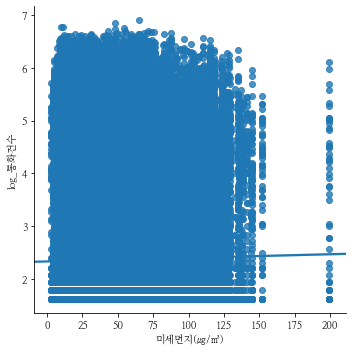

In [102]:
plot1 = sns.lmplot(x='미세먼지(㎍/㎥)', y='통화건수', data=Data, fit_reg=True)

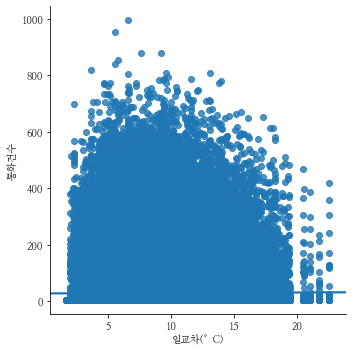

In [78]:
plot2 = sns.lmplot(x='일교차(°C)', y='통화건수', data=Data, fit_reg=True)

# GAM R에서

In [ ]:
weather = pd.read_csv('C:/Temp/Weather_2018.csv', encoding='euc-kr', parse_dates=['일시'])